In [5]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.metrics import structural_similarity, peak_signal_noise_ratio

def write_csv(name, m):
    sourceFile = open(name, 'w')
    strm = str(m)
    print(strm[1:-1], file = sourceFile)
    sourceFile.close()
    
def show(ims):
    plt.figure(figsize=(5*len(ims),5))
    
    for i in range(len(ims)):
        plt.subplot(1,len(ims),i+1)
        plt.imshow(ims[i])
        
def ssim(im1, im2, data_range=255):
    return structural_similarity(im1, im2, gaussian_weights=True, sigma=1.5, use_sample_covariance=False, data_range=data_range)
  
def psnr(im1, im2, data_range=255):
    return peak_signal_noise_ratio(im1, im2, data_range=255)

In [2]:
gt = np.load('data/gt.npy').astype(int)
pred = np.load('data/pred.npy').astype(int)
print(gt.shape)

(100, 64, 64)


0.39508186247017696
22.14490474046409


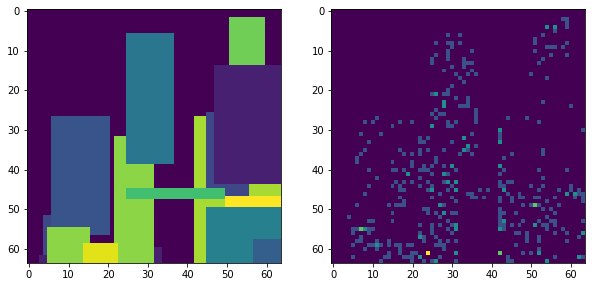

In [3]:
n = 18
print(ssim(gt[n,:,:], pred[n,:,:]))
print(peak_signal_noise_ratio(gt[n,:,:], pred[n,:,:], data_range=255))
show([gt[n,:,:], pred[n,:,:]])

In [4]:
b = gt.shape[0]
mssim = []
mpsnr = []
for i in range(b):
    mssim.append( ssim( gt[i,:,:], pred[i,:,:] ) )
    mpsnr.append( psnr( gt[i,:,:], pred[i,:,:] ) )
    
print(mpsnr)

[355.4146329737516, 351.53232375835955, 350.27263860445635, 358.0422433139396, 352.9157937412526, 352.4723183033331, 350.8476685107132, 354.68845657947725, 355.42853969293344, 350.36776128531505, 350.2861191114896, 348.2046024837982, 349.84668893743935, 353.0518064580833, 351.0163175537519, 351.1789677838775, 353.3650528801025, 352.43163692535944, 353.3118956684013, 350.796976769702, 350.115588699241, 354.5997037699942, 353.9422142343321, 351.60068661230974, 352.4463735623419, 347.7557405766666, 352.15727955455964, 352.9896934748442, 349.91523048315065, 355.0310540685492, 354.94737964612887, 351.54712910992765, 350.3617060058515, 349.5155768662996, 352.85265857009324, 352.95664456550605, 352.8079729619583, 352.82000011316165, 356.095514974449, 348.2479482495563, 350.3022343638102, 349.97646081061595, 349.59000503194454, 352.2316271260487, 353.66148620986326, 352.2245030036459, 352.6665781858531, 349.98875173232756, 353.44853880166636, 350.7656948689199, 354.17640719627934, 352.01470067

In [9]:
write_csv('data/ssim.txt', mssim)
write_csv('data/psnr.txt', mpsnr)

In [28]:
# Toy example
dims = (32, 32)

r = np.zeros(dims)
p = np.zeros(dims)

for i in range(dims[0]):
    for j in range(dims[1]):
        r[i,j] = i
        p[i,j] = i+j


ssim(r,p)

0.7433402662472663

In [30]:
# Toy example
dims = (32, 32)

r = np.zeros(dims)
p = np.zeros(dims)

for i in range(dims[0]):
    for j in range(dims[1]):
        r[i,j] = i
        p[i,j] = i+j


ssim(r,p)

0.7433402662472663